# Spectral decomposition

Diagonalization is the fundamental matrix decomposition. From this topic, you will begin to know improved versions of it that will bring you closer to the definitive understanding of all the properties of any matrix.

Today you will start with the spectral decomposition. The good news is that it's easy to compute from diagonalization. With it, you'll understand all the geometry of symmetric matrices, and you'll put the properties of unitary matrices to work.

## An improved decomposition

As you know, a square matrix $A$ of dimension $n$ is diagonalizable if there exists a diagonal matrix $D$ and an invertible one $P$, both of size $n$, such that $A = PDP^{-1}$. Since the diagonal entries of $D$ are the eigenvalues of $A$, while the columns of $P$ are the eigenvectors of $A$, this result is known as an **eigendecomposition** of $A$.

Building this decomposition isn't easy. Although calculating all the eigenvalues and eigenvectors of
$A$ can be relatively straightforward, next comes a perhaps more complicated task: inverting the matrix
$P$. Since its columns form a basis, the inverse always exists, but calculating it can involve a lot of work. Fortunately, there's a class of matrices whose inverses are trivial to calculate: unitary matrices, since their inverses are just their transposes. So, it is natural to ask when the invertible matrix $P$ can be changed to a unitary one.

So, as you remember, to build
$P$ you just need to compute a basis for each eigenspace and then combine them all to form a basis for the whole space. But wait just a minute. The columns of an orthogonal matrix form an orthonormal basis. Would improving the basis of each eigenspace by an orthonormal one be enough? After that, you'd only need to put them all together so that you get the orthonormal basis for the entire space. Finally, by putting their elements as columns of a matrix, this would end up unitary.

There is a small problem with this procedure. It's true that every eigenspace has an orthonormal basis. It is also true that by putting together all the orthonormal bases of the eigenspaces, you would end up with a basis for the whole space. It is clear that all basic vectors have lengths equal to $1$. Also, if they belong to the same eigenspace, then they are orthogonal. But nothing guarantees that if they come from different eigenspaces, they're orthogonal to each other! That is, the final base may not be orthogonal. You were very close to success.

But there's still hope. Although symmetric matrices may seem simple at first, it is surprising that they're precisely the only ones for which this improved decomposition works. That is, the eigenvectors of different eigenspaces are orthogonal to each other. With this, you're finally ready for the promised result, the **spectral decomposition**:


For any symmetric matrix $A$ there exists a unitary matrix $U$ and a diagonal one $D$, both of size $n$, such that:

$$
A = U D U^{-1}
$$



Although symmetric matrices may seem unhelpful at first, they arise naturally in many applications. For example, probability studies the interactions between different random phenomena through the covariance matrix that turns out to be symmetric. In graph theory, which studies relationships between similar objects (for example, you might have a set of cities that you want to connect by building roads), the adjacency matrix is used to order these relationships, which also ends up being symmetric.

## An easy computation

supose you have the matrix:

$$
A = \begin{bmatrix}
5 & -2 & \\
-2 & 5 \\
\end{bmatrix}
$$

Compute the pieces U and D of a spectral decomposition for A.

In [3]:
import math

import numpy as np

In [4]:
A = np.array([[5, -2], [-2, 5]])

In [5]:
values, vectors = np.linalg.eig(A)

In [6]:
values

array([7., 3.])

In [8]:
vectors

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [9]:
orthonormal_vectors = np.zeros_like(vectors)

for i in range(vectors.shape[1]):
    v = vectors[:, i]
    orthonormal_vectors[:, i] = v / np.linalg.norm(v)

print("Orthonormal basis vectors (columns):")
print(orthonormal_vectors)

Orthonormal basis vectors (columns):
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [38]:
[[values[0],0], [0, values[1]]]

[[np.float64(7.0), 0], [0, np.float64(3.0000000000000004)]]

In [10]:
orthonormal_vectors @ np.array([[values[0],0], [0, values[1]]]) @ orthonormal_vectors.T

array([[ 5., -2.],
       [-2.,  5.]])

In [11]:
eigenvalues, U = np.linalg.eigh(A)

D = np.diag(eigenvalues)

print("U (orthonormal eigenvectors):")
print(U)

print("\nD (diagonal of eigenvalues):")
print(D)

print("\nCheck reconstruction A = U D U^T:")
print(U @ D @ U.T)

U (orthonormal eigenvectors):
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

D (diagonal of eigenvalues):
[[3. 0.]
 [0. 7.]]

Check reconstruction A = U D U^T:
[[ 5. -2.]
 [-2.  5.]]


In [12]:
A = np.array([[1, 0, 1],[0, 1, 0], [1, 0, 1]], dtype=float)

In [13]:
eigenvalues, vectors = np.linalg.eigh(A)

In [14]:
print("eigenvalues: ", eigenvalues)
print("vectors:", vectors)

eigenvalues:  [0. 1. 2.]
vectors: [[-0.70710678  0.         -0.70710678]
 [ 0.         -1.          0.        ]
 [ 0.70710678  0.         -0.70710678]]


In [15]:
math.sqrt(2) * vectors

array([[-1.        ,  0.        , -1.        ],
       [ 0.        , -1.41421356,  0.        ],
       [ 1.        ,  0.        , -1.        ]])

In [16]:
D = np.diag(eigenvalues)

In [17]:
D

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 2.]])

In [18]:
vectors @ D @ vectors.T

array([[1., 0., 1.],
       [0., 1., 0.],
       [1., 0., 1.]])

## The Geometry of Symmetric Matrices

Thanks to **spectral decomposition**, you can decompose the geometric behavior of any symmetric matrix $A$ into simple, intuitive steps. Recall that the linear operator associated with $A$ can be written as the following composition:

$$
L_A = L_U \circ L_D \circ L_{U^T}
$$

Thus, the action of $L_A$ can be understood as a sequence of three stages:

1. Since $U^T$ is a unitary matrix, the action of
   $$
   L_{U^T}
   $$
   corresponds to a **rotation** (or reflection) of the space.

2. Because $D$ is a diagonal matrix, the operator
   $$
   L_D
   $$
   performs a **stretching or compression** of the space along the coordinate axes, with scaling factors given by the eigenvalues.

3. Finally,
   $$
   L_U
   $$
   applies a **rotation in the opposite direction** of $L_{U^T}$, undoing the initial change of basis.

Since the first rotation is exactly countered by the final one, the overall effect of $L_A$ is geometrically equivalent to a **pure stretch of the space along orthogonal directions**.

In summary, symmetric matrices act by rotating the space into an eigenbasis, stretching it along perpendicular axes, and rotating it back—making their geometric behavior particularly transparent and well-behaved.

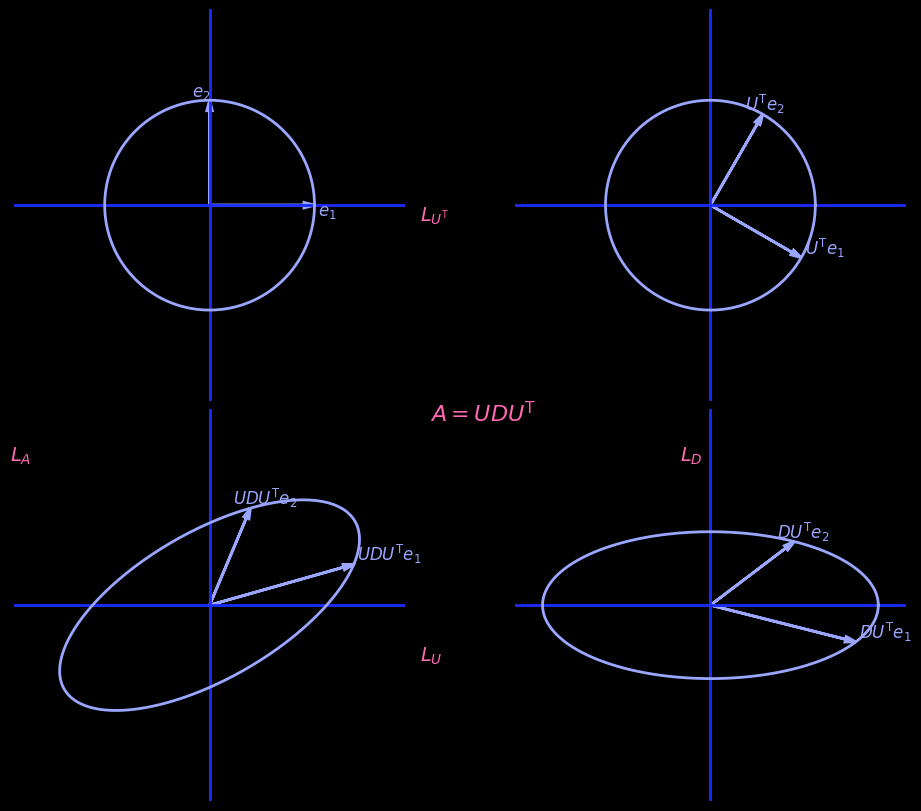

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- helpers ----------
def draw_axes(ax, axis_color='#1a2cff'):
    ax.axhline(0, color=axis_color, lw=2)
    ax.axvline(0, color=axis_color, lw=2)
    ax.set_aspect('equal')
    ax.set_xlim(-2.8, 2.8)
    ax.set_ylim(-2.8, 2.8)
    ax.set_xticks([])
    ax.set_yticks([])
    for s in ax.spines.values():
        s.set_visible(False)

def draw_circle(ax, r=1.5, color='#9aa6ff'):
    t = np.linspace(0, 2*np.pi, 400)
    ax.plot(r*np.cos(t), r*np.sin(t), color=color, lw=2)

def draw_ellipse(ax, M, r=1.5, color='#9aa6ff'):
    t = np.linspace(0, 2*np.pi, 400)
    pts = np.vstack((r*np.cos(t), r*np.sin(t)))
    T = M @ pts
    ax.plot(T[0], T[1], color=color, lw=2)

def vec(ax, v, color='#9aa6ff', label=None, offset=(0,0)):
    ax.arrow(0, 0, v[0], v[1],
             head_width=0.08, head_length=0.15,
             lw=2, fc=color, ec=color, length_includes_head=True)
    if label:
        ax.text(v[0] + offset[0], v[1] + offset[1],
                label, color=color, fontsize=12)

# ---------- matrices ----------
theta = np.deg2rad(30)
U = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
UT = U.T
D  = np.diag([1.6, 0.7])
A  = U @ D @ UT

e1 = np.array([1.0, 0.0])
e2 = np.array([0.0, 1.0])

# radius used for the circle/parameterization (IMPORTANT)
r = 1.5

# ---------- figure ----------
fig, axs = plt.subplots(2, 2, figsize=(10, 8), constrained_layout=True)

# --- (1) Unit circle ---
ax = axs[0,0]
draw_axes(ax)
draw_circle(ax, r=r)
vec(ax, r*e1, label=r"$e_1$", offset=(0.05,-0.15))
vec(ax, r*e2, label=r"$e_2$", offset=(-0.25,0.05))

# --- (2) Apply U^T (still a circle) ---
ax = axs[0,1]
draw_axes(ax)
draw_circle(ax, r=r)
vec(ax, r*(UT@e1), label=r"$U^{\mathrm{T}}e_1$", offset=(0.05,0.05))
vec(ax, r*(UT@e2), label=r"$U^{\mathrm{T}}e_2$", offset=(-0.25,0.05))

# --- (3) Apply D (axis-aligned ellipse) ---
ax = axs[1,1]
draw_axes(ax)
draw_ellipse(ax, D, r=r)
vec(ax, r*(D@UT@e1), label=r"$DU^{\mathrm{T}}e_1$", offset=(0.05,0.05))
vec(ax, r*(D@UT@e2), label=r"$DU^{\mathrm{T}}e_2$", offset=(-0.25,0.05))

# --- (4) Apply U (rotated ellipse) ---
ax = axs[1,0]
draw_axes(ax)
draw_ellipse(ax, A, r=r)
vec(ax, r*(A@e1), label=r"$UDU^{\mathrm{T}}e_1$", offset=(0.05,0.05))
vec(ax, r*(A@e2), label=r"$UDU^{\mathrm{T}}e_2$", offset=(-0.25,0.05))

# ---------- annotations ----------
pink = 'hotpink'
fig.text(0.46, 0.73, r"$L_{U^{\mathrm{T}}}$", color=pink, fontsize=14)
fig.text(0.72, 0.43, r"$L_D$", color=pink, fontsize=14)
fig.text(0.46, 0.18, r"$L_U$", color=pink, fontsize=14)
fig.text(0.05, 0.43, r"$L_A$", color=pink, fontsize=14)
fig.text(0.47, 0.48, r"$A = UDU^{\mathrm{T}}$", color=pink, fontsize=16)

plt.show()

## Computing the Decomposition

The procedure to calculate the **spectral decomposition** is almost identical to the one you already know for **diagonalization**. You just need one extra step (orthonormalizing eigenvectors), which is quite predictable.

### Procedure

1. **Find all eigenvalues** of $A$.
2. **Compute the eigenspace** for each eigenvalue.
3. **Form an orthonormal basis** for each eigenspace.
4. **Build $U$**: its columns are the vectors from all the orthonormal bases (concatenated).
5. **Build $D$**: a diagonal matrix whose diagonal entries are the eigenvalues corresponding to the eigenvectors in $U$, in the same order.
   If an eigenvalue has multiple eigenvectors, repeat that eigenvalue on the diagonal as many times as needed.

### Clarifications

- By the **spectral theorem**, every **symmetric** matrix is automatically diagonalizable, so you do not need to worry about the geometric multiplicity of eigenvalues.
- Each **eigenspace** is a subspace, so you can compute a basis for it. From that basis, you can build an **orthonormal basis** (for example, using the Gram–Schmidt procedure).

Let’s compute a couple of decompositions.

## A Quick Example

Consider the following matrix:
$$
A =
\begin{pmatrix}
3 & 2 \\
2 & 3
\end{pmatrix}.
$$

### Step 1: Eigenvalues

Compute the characteristic polynomial:
$$
\chi(\lambda) = \det(A - \lambda I)
= \lambda^2 - 6\lambda + 5.
$$

Solving $\chi(\lambda)=0$, we obtain the eigenvalues:
$$
\lambda_1 = 5, \qquad \lambda_2 = 1.
$$

### Step 2: Eigenspaces and Orthonormal Bases

- **Eigenvalue $\lambda = 5$**

  The eigenspace is
  $$
  E_5 = \{\, x(1,1)^T : x \in \mathbb{R} \,\}.
  $$

  A basis is $\{(1,1)^T\}$.
  Normalizing, an orthonormal basis is
  $$
  \left\{ \frac{1}{\sqrt{2}}(1,1)^T \right\}.
  $$

- **Eigenvalue $\lambda = 1$**

  The eigenspace is
  $$
  E_1 = \{\, x(-1,1)^T : x \in \mathbb{R} \,\}.
  $$

  An orthonormal basis is
  $$
  \left\{ \frac{1}{\sqrt{2}}(-1,1)^T \right\}.
  $$

### Step 3: Build $U$ and $D$

Using the orthonormal eigenvectors as columns of $U$, and the corresponding eigenvalues on the diagonal of $D$:
$$
U = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -1 \\
1 & \phantom{-}1
\end{pmatrix},
\qquad
D =
\begin{pmatrix}
5 & 0 \\
0 & 1
\end{pmatrix}.
$$

### Spectral Decomposition

The spectral decomposition of $A$ is therefore:
$$
A = U D U^T.
$$

## Being Careful

Now take a bigger matrix:
$$
A=
\begin{pmatrix}
-1 & 2 & 2 \\
2 & -1 & 2 \\
2 & 2 & -1
\end{pmatrix}.
$$

It is easy to compute its characteristic polynomial:
$$
\chi(\lambda)=\det(A-\lambda I)=-\lambda^3-3\lambda^2+9\lambda+27,
$$
so the eigenvalues are $3$ and $-3$.

### Eigenvalue $\lambda=3$

The eigenspace is
$$
E_3=\{\,x(1,1,1)^T : x\in\mathbb{R}\,\}.
$$

An orthonormal basis is
$$
\left\{
\frac{1}{\sqrt{3}}(1,1,1)^T
\right\}.
$$

### Eigenvalue $\lambda=-3$

The eigenspace is
$$
E_{-3}=\left\{
x(-1,0,1)^T+y(-1,1,0)^T : x,y\in\mathbb{R}
\right\}.
$$

A natural basis is
$$
\left\{
(-1,0,1)^T,\;(-1,1,0)^T
\right\},
$$
but it is not orthogonal. Applying Gram–Schmidt yields an orthonormal basis, for example:
$$
\left\{
\frac{1}{\sqrt{2}}(-1,0,1)^T,\;
\frac{1}{\sqrt{6}}(-1,2,-1)^T
\right\}.
$$

### Build $U$ and $D$

Using the orthonormal eigenvectors as columns of $U$ (in the order $3,-3,-3$), and the eigenvalues on the diagonal of $D$:
$$
U=
\begin{pmatrix}
\frac{1}{\sqrt{3}} & -\frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{6}} \\
\frac{1}{\sqrt{3}} & 0 & \frac{2}{\sqrt{6}} \\
\frac{1}{\sqrt{3}} & \frac{1}{\sqrt{2}} & -\frac{1}{\sqrt{6}}
\end{pmatrix},
\qquad
D=
\begin{pmatrix}
3 & 0 & 0 \\
0 & -3 & 0 \\
0 & 0 & -3
\end{pmatrix}.
$$

### Spectral Decomposition

Therefore, the spectral decomposition is:
$$
A = UDU^T.
$$


## Conclusion

The **spectral decomposition** is an enhanced form of diagonalization that fully characterizes **symmetric matrices**.

A matrix $A$ is symmetric **if and only if** there exists a **unitary (orthogonal)** matrix $U$ and a **diagonal** matrix $D$, both of size $n$, such that
$$
A = U D U^T.
$$

### Geometric Interpretation

The linear transformation associated with a symmetric matrix can be understood as a composition of:
1. a **rotation**,
2. a **stretching** (along orthogonal directions),
3. a **rotation in the opposite direction**.

Thus, despite possibly looking complicated algebraically, the geometric action of a symmetric matrix is fundamentally simple.

### Computing the Spectral Decomposition

To compute the spectral decomposition of a symmetric matrix:

- Diagonalize the matrix as usual,
- **with the additional requirement** that the eigenvectors are
  - **orthogonal**, and
  - **normalized to unit length**.

This requirement is always satisfiable for symmetric matrices, thanks to the **spectral theorem**.